In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
df=pd.read_csv("../input/stores-area-and-sales-data/Stores.csv")
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


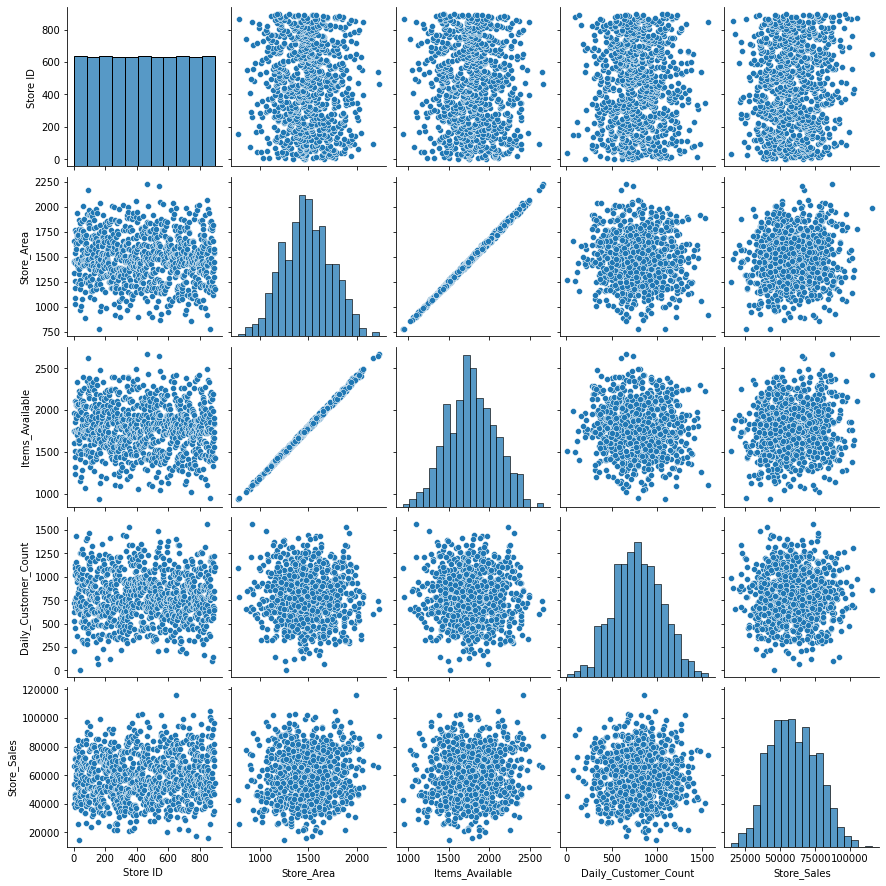

In [3]:
sb.pairplot(df,palette='Paired')

**Frekuensi jumlah barang di setiap toko**

<AxesSubplot:xlabel='Items_Available', ylabel='Count'>

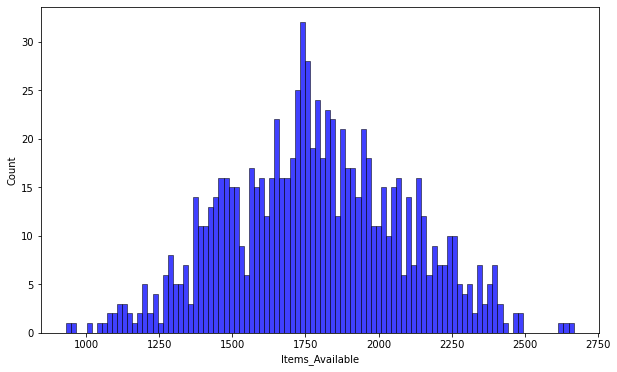

In [4]:
ax=plt.figure(figsize=(10,6))
sb.histplot(df["Items_Available"],color="blue",bins=100)

**Korelasi dari setiap variabel**

<AxesSubplot:>

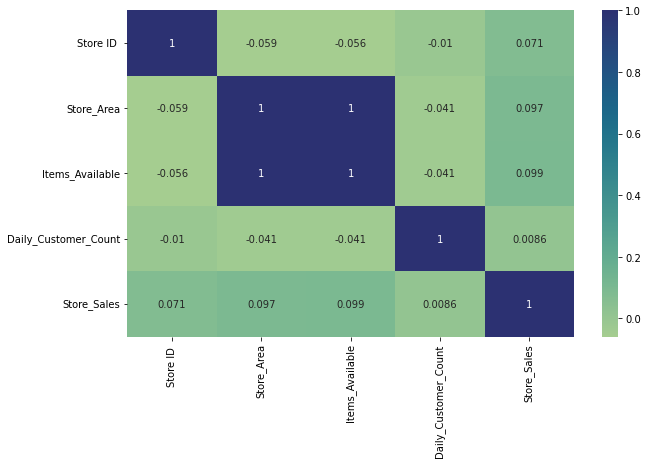

In [5]:
ax=plt.figure(figsize=(10,6))
corr=df.corr()
sb.heatmap(corr, annot=True, cmap='crest')

Terdapat korelasi antara Store_Area dengan Items_Available

In [6]:
X=df[["Store_Area"]]
y=df[["Items_Available"]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
pred = lr.predict(X_test)

In [10]:
#uji akurasi model
lr.score(X_test, y_test)

0.9975369279818469

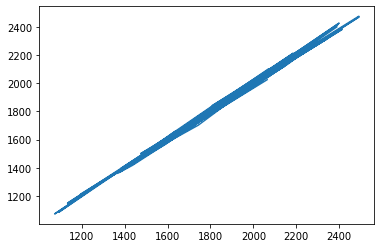

In [11]:
#menampilkan hubungan antara data yang diuji dan diprediksi
plt.plot(y_test, pred)

Semakin luas Store_Area akan semakin banyak Items_Available

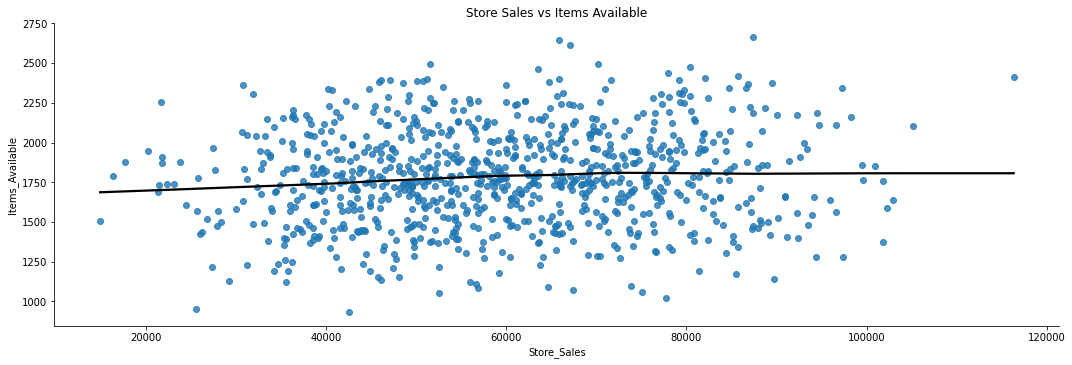

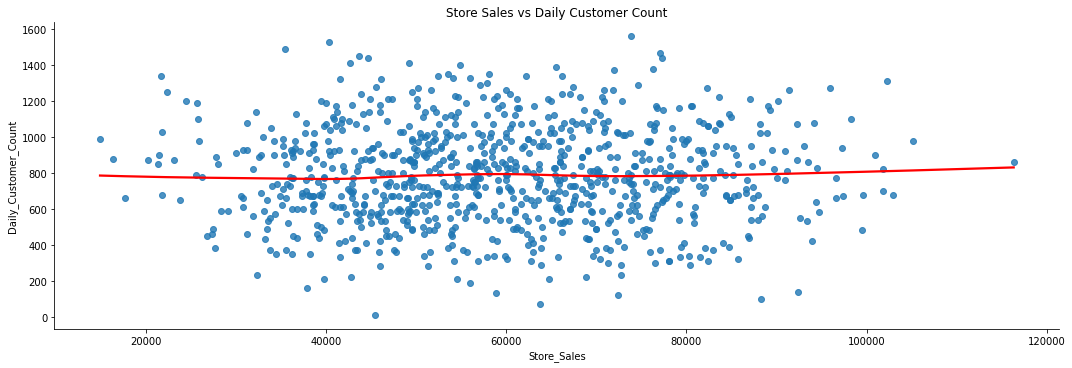

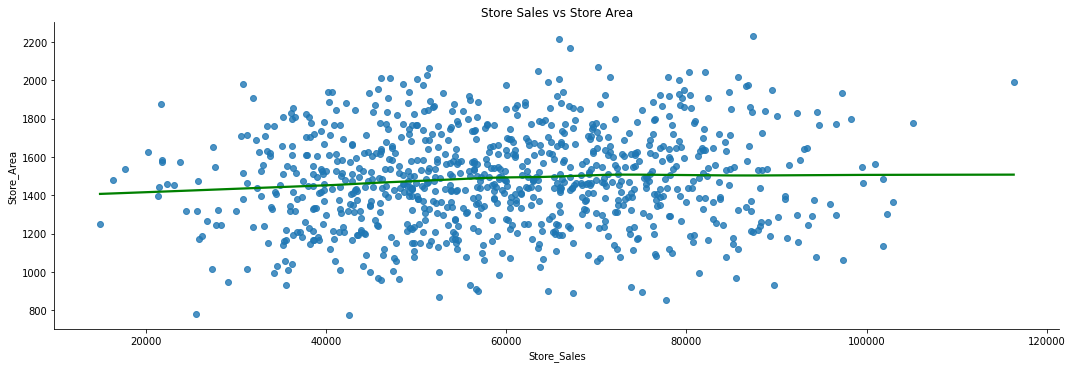

In [12]:
analysis_all = ["Items_Available", "Daily_Customer_Count", "Store_Area"]
color_all = ["black", "red", "green"]
title_all = ["Store Sales vs Items Available", "Store Sales vs Daily Customer Count", "Store Sales vs Store Area"]
for i,j,k in zip(analysis_all, color_all, title_all):
    sns.lmplot(x ="Store_Sales", y= i, data = df, lowess = True, aspect = 3, line_kws = {'color':j}).set(title=k)
    plt.show()

* Store_Sales lebih banyak ketika Items_Available juga lebih banyak
* Store_Sales tidak tergantung pada Daily_Customer_Count
* Store_Sales sedikit lebih banyak ketika Store_Area lebih luas

**Jadi, prediksi penjualan supermarket lebih bergantung pada barang yang tersedia dan luas area supermarket tidak tergantung pada hitungan pelanggan harian.**